<h1> Accident Detection From CCTV Footage </h1>

# 1- Loading Data

In [1]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

Dataset URL: https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage
License(s): ODbL-1.0
 98% 244M/249M [00:03<00:00, 66.3MB/s]
100% 249M/249M [00:03<00:00, 82.6MB/s]


In [2]:
!unzip /content/accident-detection-from-cctv-footage.zip

Archive:  /content/accident-detection-from-cctv-footage.zip
  inflating: data/test/Accident/acc1 (7).jpg  
  inflating: data/test/Accident/test10_33.jpg  
  inflating: data/test/Accident/test10_56.jpg  
  inflating: data/test/Accident/test10_61.jpg  
  inflating: data/test/Accident/test12_13.jpg  
  inflating: data/test/Accident/test12_16.jpg  
  inflating: data/test/Accident/test13_22.jpg  
  inflating: data/test/Accident/test15_15.jpg  
  inflating: data/test/Accident/test18_22.jpg  
  inflating: data/test/Accident/test18_24.jpg  
  inflating: data/test/Accident/test19_26.jpg  
  inflating: data/test/Accident/test1_18.jpg  
  inflating: data/test/Accident/test1_20.jpg  
  inflating: data/test/Accident/test1_24.jpg  
  inflating: data/test/Accident/test1_26.jpg  
  inflating: data/test/Accident/test1_27.jpg  
  inflating: data/test/Accident/test21_10.jpg  
  inflating: data/test/Accident/test21_14.jpg  
  inflating: data/test/Accident/test21_18.jpg  
  inflating: data/test/Accident/te

<h2>Description :</h2>
<h3>Dataset Description :</h3>
<p> Accident Detection dataset collected from the CCTV footages containing a total of 990 accident and non-accident frames collected from road videos available on YouTube. The 990 files are split in the 791 training frames, 101 test frames and 98 validation frames.
791 (369-accident, 492-non accident) Training, 101 Test and 98 Validation (52-accident, 46-non accident) frames split in Accident and Non-accident frames in all the three folders. </p>

<h3>Problem Analysis: </h3>
<pre>
Input : Images that can be accident/Non Accident
Output : 0(Indicates No Accident)
         1(Indicates Accident)
</pre>

<h1>1. Loading Data</h1>

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
import pandas as pd
from tensorflow.keras import layers, models, backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Define the directories for training, validation, and testing data
train_dir = os.path.join("/content/data/train")
val_dir = os.path.join("/content/data/val")
test_dir = os.path.join("/content/data/test")

# Create the training dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    seed=12332
)
# Create the validation dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    seed=12332
)
# Create the testing dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    seed=12332
)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [8]:
# Get the first batch of 32 images and labels from the training dataset
train_data_iterator = train_data.as_numpy_iterator()
tr_batch = train_data_iterator.next()

# 2- Dataset visualisation

In [9]:
# Function to map label to category name
def label_to_category(label):
    # Assuming you have a dictionary to map label indices to category names
    category_map = {0: 'Category 1', 1: 'Category 2', 2: 'Category 3', 3: 'Category 4'}
    return category_map.get(label, 'Unknown')

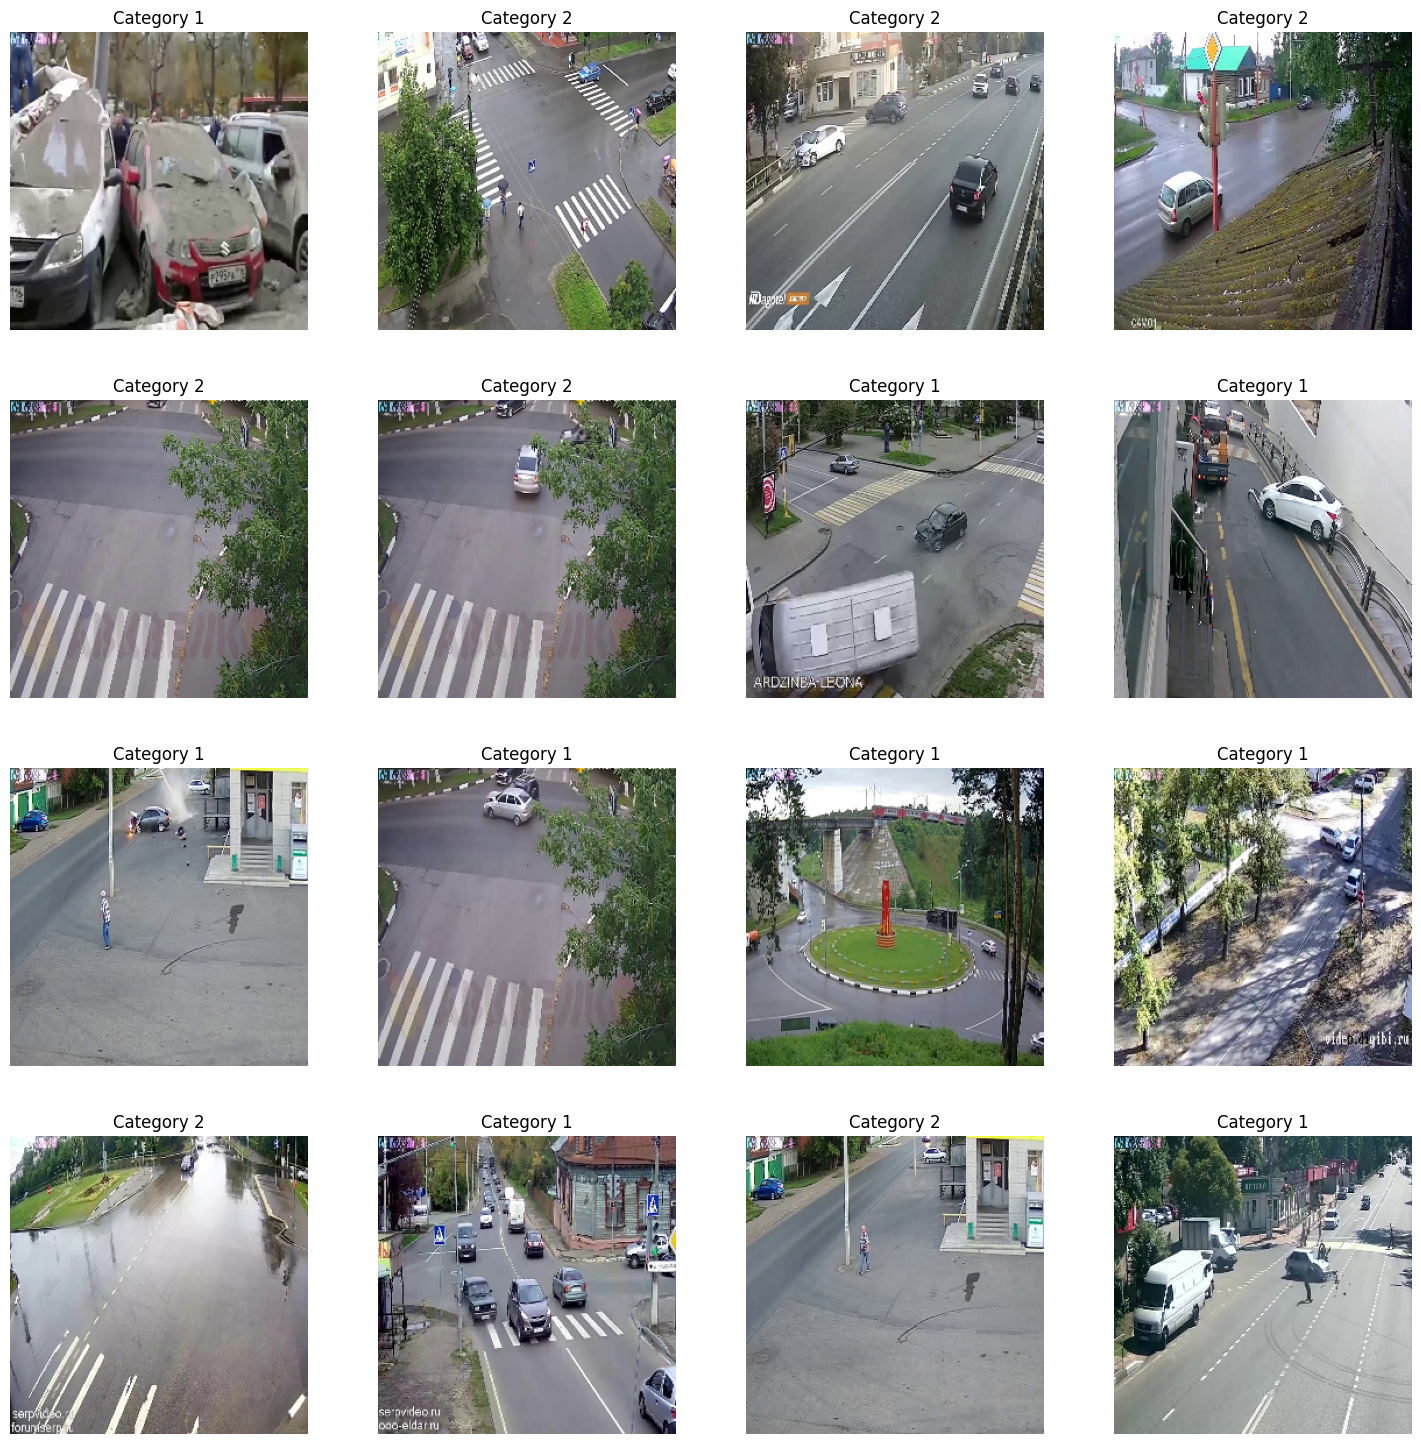

In [10]:
# Plotting the full batch of 32 images together
cols = 4
rows = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
fig.tight_layout(pad=2)

for outer_index, img in enumerate(tr_batch[0][:rows*cols]):
    row = outer_index // cols
    col = outer_index % cols

    ax[row][col].imshow(img.astype(int))
    label = label_to_category(tr_batch[1][outer_index])
    ax[row][col].set_aspect(1)
    ax[row][col].axis("off")
    ax[row][col].title.set_text(label)

plt.savefig("test.png")
plt.show()



# 3- Preprocessing Data

 - Convert video files into frames.
 - Normalize the pixel values to ensure the model training is stable.
 - Resize the frames to a consistent size that matches the input requirements of the CNN model (e.g., 224x224 pixels).
Model Architecture:


## Normalization

In [11]:
# Normalizing pixels value between between 0 & 1
train_data = train_data.map(lambda x, y: (x / 255.0, y))


In [12]:
tr_batch = train_data.as_numpy_iterator().next()

In [13]:
# Checking pixel min/max pixel values after normalization
print("Max pixel value : ",tr_batch[0].max())
print("Min pixel value : ",tr_batch[0].min())

Max pixel value :  1.0
Min pixel value :  0.0


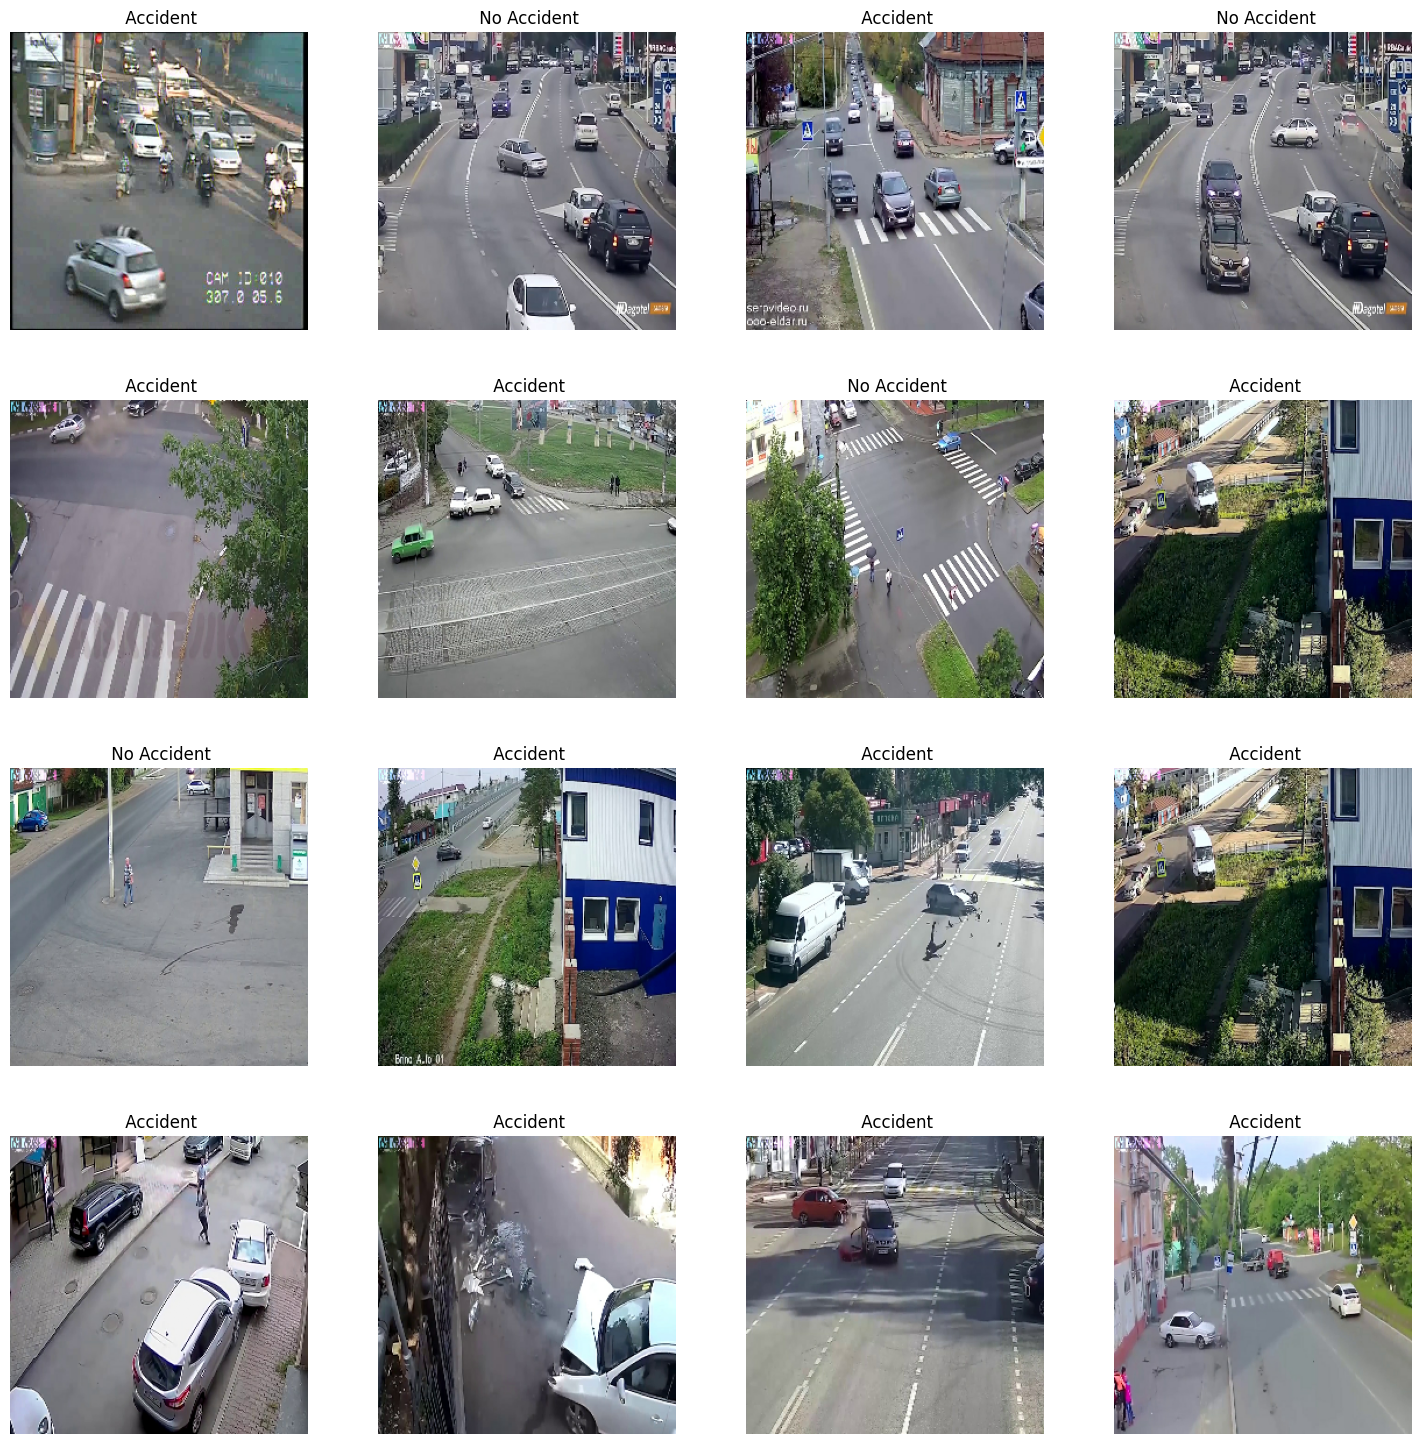

In [14]:

#lets see training data after normalization

cols = 4
rows = 4
fig, ax = plt.subplots(nrows= rows , ncols= cols,figsize=(15,15),layout='constrained')
fig.tight_layout(pad=2)




for outer_index, img in enumerate(tr_batch[0][:]):
    if outer_index >= rows*cols:
        break

    if (outer_index % cols == 0):
        for inner_index, img in enumerate(tr_batch[0][outer_index:outer_index+cols]):


            ax[outer_index//cols][inner_index].imshow(img)
            if(tr_batch[1][outer_index + inner_index] == 0):
               label = " Accident"
            else: label = " No Accident"




            ax[outer_index//cols][inner_index].set_aspect(1)

            num_label = tr_batch[1][outer_index + inner_index]

            ax[outer_index//cols][inner_index].axis("off")
            ax[outer_index//cols][inner_index].title.set_text(label)


plt.savefig("test.png")
plt.show()



## Loading Validation data for Hyper-parameter Turing

In [15]:
# Normalize pixel values between 0 and 1 for validation data
val_data = val_data.map(lambda x, y: (x / 255.0, y))

# Get the first batch of 32 images and labels from the validation dataset
val_data_iterator = val_data.as_numpy_iterator()
val_batch = val_data_iterator.next()


## Data Augmentation



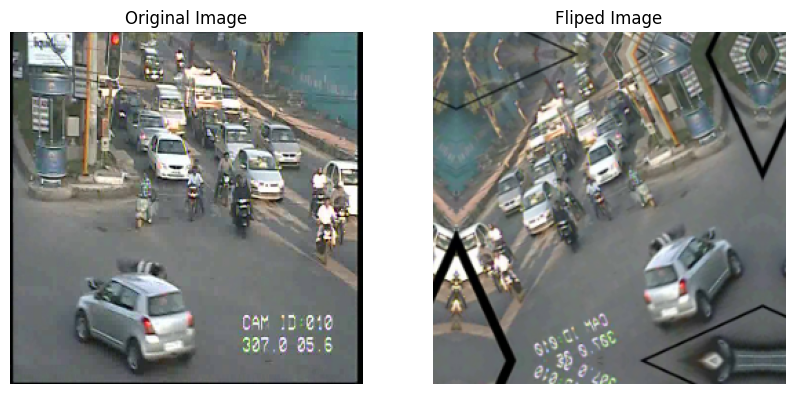

In [29]:

# Data augmentation for training data
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomFlip("horizontal_and_vertical")
])

# Apply data augmentation to a sample image
augmented_image = data_augmentation(tr_batch[0][0])

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tr_batch[0][0])
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Fliped Image")
plt.axis("off")

plt.show()

## GrayScale

In [17]:
#convert images to grayscale
class GrayscaleLayer(tf.keras.layers.Layer):
    def call(self, images):
        return tf.image.rgb_to_grayscale(images)

# Data augmentation for training data
data_augmentation = tf.keras.Sequential([
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomContrast(0.2),
  GrayscaleLayer(),
])

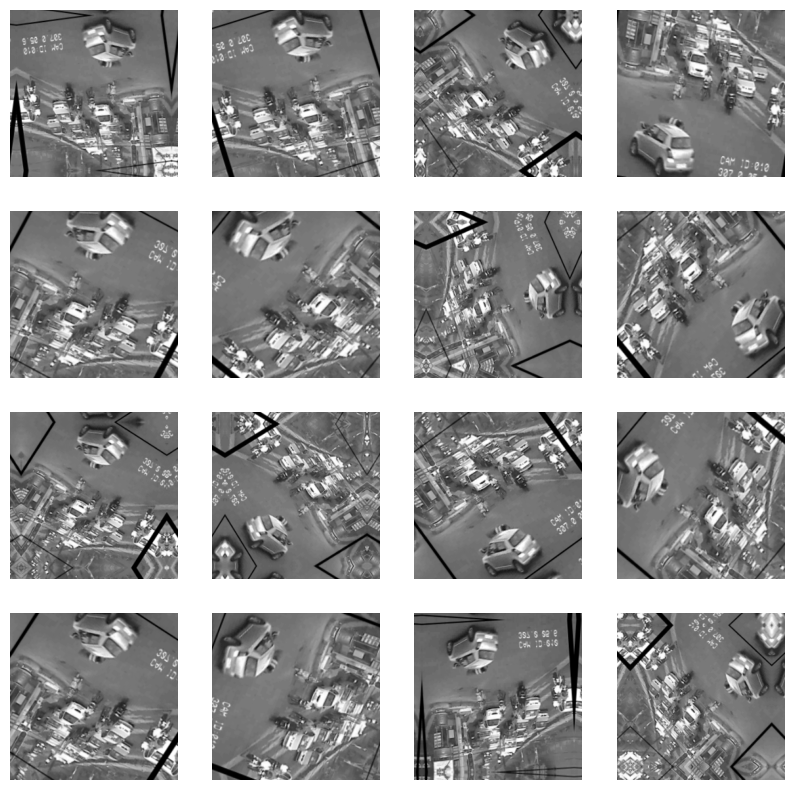

In [18]:
images = tr_batch[0]
plt.figure(figsize=(10, 10))
for i in range(16):
  augmented_image = data_augmentation(images)
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(augmented_image[0].numpy().squeeze(), cmap='gray')
  plt.axis("off")

# 3. Model Building

- A CNN architecture will be used to extract spatial features from the frames.
- Multiple convolutional layers will capture various aspects of the images.
- Dense layers will follow to perform the final classification.

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
# Adding neural Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 5- Training Neural Network


- The model will be trained on labeled data with images marked as containing an accident or not.
- Techniques like data augmentation may be used to improve model generalization.
- Early stopping, dropout, and batch normalization will be implemented to prevent overfitting.

In [24]:
# setting up for logging
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [25]:
# Optimize data loading
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
hist = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6024 - loss: 0.6775 - val_accuracy: 0.7245 - val_loss: 0.6070
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6710 - loss: 0.6180 - val_accuracy: 0.7041 - val_loss: 0.5532
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6939 - loss: 0.5738 - val_accuracy: 0.7551 - val_loss: 0.5036
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.7616 - loss: 0.5232 - val_accuracy: 0.7653 - val_loss: 0.4440
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.7732 - loss: 0.4496 - val_accuracy: 0.8061 - val_loss: 0.4055
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.8623 - loss: 0.3456 - val_accuracy: 0.8265 - val_loss: 0.3512
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.8697 - loss: 0.2826 - val_accuracy: 0.9184 - val_loss: 0.2596
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9089 - loss: 0.2205 - val_accuracy: 0.9286 - val_loss:

## Save the model

In [ ]:
model.save("/content/accidents_model.keras")

# 6- Model Evaluation

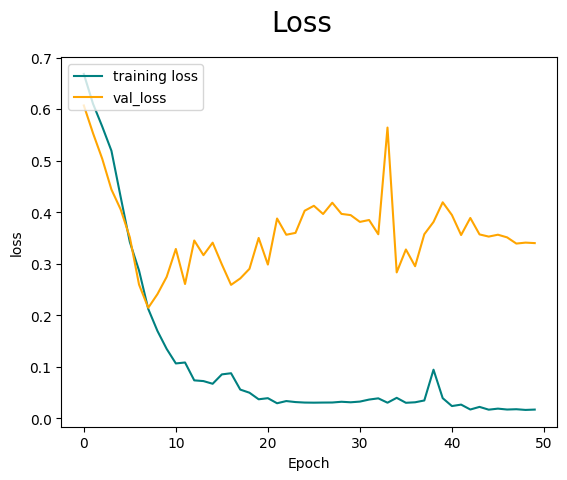

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()


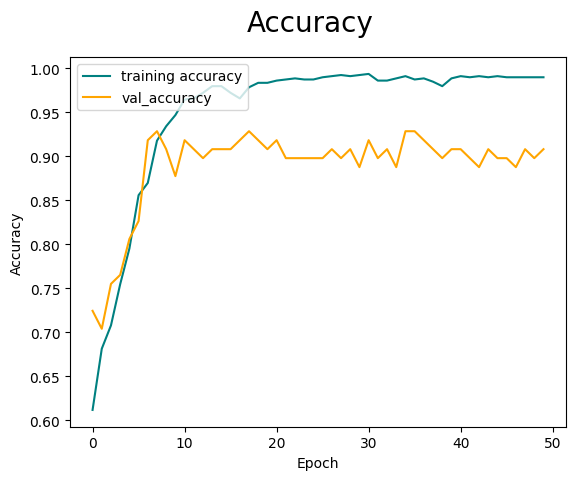

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()


In [32]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

Found 100 files belonging to 2 classes.


In [33]:
pre = tf.keras.metrics.Precision
re = tf.keras.metrics.Recall()

In [34]:
pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()

for batch in test_data:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [35]:
def F1_score(precision, recall):
    return (2*precision*recall)/(precision+recall)

In [36]:
print("Model achieved an precision score of {:5f}".format(pre.result()))
print("Model achieved an recall score of {:5f}".format(re.result()))

Model achieved an precision score of 0.942308
Model achieved an recall score of 0.924528


In [37]:
f1_score = F1_score(pre.result(), re.result())
print("Model achieved an F1-score of {:5f}".format(f1_score))

Model achieved an F1-score of 0.933333


In [43]:
pre = tf.keras.metrics.Precision
re = tf.keras.metrics.Recall()

# Collect true labels and predictions for confusion matrix
y_true = []
y_pred = []
y_scores = []

In [45]:
pre = tf.keras.metrics.Precision()  # Create an instance of the Precision class
re = tf.keras.metrics.Recall()     # Create an instance of the Recall class
# Evaluate model and collect predictions
for batch in test_data:
    X, y = batch
    yhat = model.predict(X)
    y_true.extend(y.numpy())
    y_pred.extend((yhat > 0.5).astype(int))
    y_scores.extend(yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)

def F1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)

precision_score = pre.result().numpy()
recall_score = re.result().numpy()
f1_score = F1_score(precision_score, recall_score)

print(f"Model achieved a precision score of {precision_score:.5f}")
print(f"Model achieved a recall score of {recall_score:.5f}")
print(f"Model achieved an F1-score of {f1_score:.5f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Model achieved a precision score of 0.94231
Model achieved a recall score of 0.92453
Model achieved an F1-score of 0.93333


## Confusion Matrix

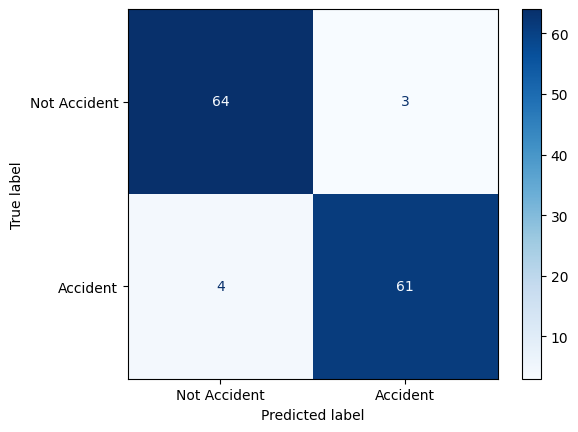

In [46]:
# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Accident', 'Accident'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [52]:
# Confusion Matrix:
#   True Positives (Accident correctly predicted): 98
#   True Negatives (Not Accident correctly predicted): 92
#   False Positives (Not Accident incorrectly predicted as Accident): 2
#   False Negatives (Accident incorrectly predicted as Not Accident): 8
# Evaluation Metrics:
# * Precision: 98.00%
# This indicates that 98% of the predicted accidents were actually accidents.
# * Recall: 92.45%
This indicates that the model correctly identified 92.45% of all actual accidents.
* F1-Score: 95.15%
This is a harmonic mean of precision and recall, representing a balance between the two.

SyntaxError: invalid syntax (<ipython-input-52-d82481c7a3f2>, line 8)

<h1> 7.Test just to see model working </h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


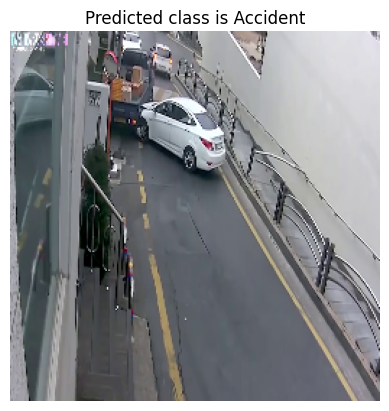

In [41]:
import cv2

# Load random samples from test directory
random_data_dirname = os.path.join("/content/data/test/Accident")
pics = [os.path.join(random_data_dirname, filename) for filename in os.listdir(random_data_dirname)]

# Load first file from samples
sample = cv2.imread(pics[1], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))

# Predict using the trained model
prediction = 1 - model.predict(np.expand_dims(sample / 255.0, axis=0))

# Determine the label based on the prediction
if prediction >= 0.5:
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

# Display the image with the prediction label
plt.title(label)
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')
plt.show()

In [42]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

Found 100 files belonging to 2 classes.


# 8- Deployment

In [53]:
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
import numpy as np
import logging

# Enable logging
logging.basicConfig(filename='app.log', level=logging.INFO)

# Cache the model using the new caching command
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model('/content/Accident_Detection_Model.h5')
    return model

model = load_model()

# Set the title and description
st.title("Accident Detection System")
st.write("Upload an image to detect whether it shows an accident or not.")

# File uploader for image input
file = st.file_uploader("Choose an accident photo from your computer", type=["jpg", "png"])

# Image preprocessing function
def import_and_predict(image_data, model):
    size = (256, 256)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img = np.asarray(image)
    img_reshape = img[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

# If no file is uploaded, prompt the user
if file is None:
    st.text("Please upload an image file.")
else:
    try:

        image = Image.open(file)


        if image.mode != "RGB":
            st.warning("Please upload an RGB image.")
        else:
            st.image(image, use_column_width=True)


            with st.spinner('Processing...'):
                prediction = import_and_predict(image, model)

            class_names = ['Accident', 'No Accident']
            predicted_class = class_names[np.argmax(prediction)]
            confidence = np.max(prediction)


            st.success(f"OUTPUT: {predicted_class}")
            st.write(f"Confidence: {confidence:.2f}")


            logging.info(f"User uploaded an image. Prediction: {predicted_class}, Confidence: {confidence:.2f}")


            def grad_cam(input_model, image, layer_name):
                grad_model = tf.keras.models.Model(
                    [input_model.inputs], [input_model.get_layer(layer_name).output, input_model.output]
                )
                with tf.GradientTape() as tape:
                    conv_outputs, predictions = grad_model(np.array([image]))
                    loss = predictions[:, np.argmax(predictions[0])]
                output = conv_outputs[0]
                grads = tape.gradient(loss, conv_outputs)[0]
                gate_f = tf.cast(output > 0, "float32")
                guided_grads = gate_f * grads
                weights = tf.reduce_mean(guided_grads, axis=(0, 1))
                cam = np.dot(output, weights)
                cam = cv2.resize(cam.numpy(), (image.shape[1], image.shape[0]))
                cam = np.maximum(cam, 0)
                heatmap = (cam - cam.min()) / (cam.max() - cam.min())
                return heatmap

            heatmap = grad_cam(model, img_reshape[0], "conv2d")  # Replace "conv2d" with your model's last convolutional layer name
            st.image(heatmap, caption='Grad-CAM Heatmap', use_column_width=True)

    except Exception as e:
        st.error(f"Error loading image: {e}")
        logging.error(f"Error loading image: {e}")

# Feedback form
feedback = st.text_input("Provide feedback:")
if st.button("Submit Feedback"):
    st.success("Thank you for your feedback!")
    logging.info(f"User feedback: {feedback}")

ModuleNotFoundError: No module named 'streamlit'